<h1><center>SPEV311 — Introduction à l'Informatique — TP 10</center><br>
<center>Révision et ouverure à la Bioinformatique</center></h1>

<h3>Auto-évaluation</h3>

<div> Les exercices se divisent en trois niveaux d'auto-évaluation:
<ul>
    <li><h3><font color='white' style='background-color:orange'>Fondamentaux</font></h3> Pour réviser les notions apprises en cours. Il faut tous les savoir résoudre pour avoir la moyenne.</li>
    <li><h3><font color='white' style='background-color:green'>Intermédiaires</font></h3> Pour vous aider à raisonner et rentrer au coeur des sujets. Si vous saurez tous les résoudre, vous aurez un bon niveau de préparation !</li>
    <li><h3><font color='white' style='background-color:blue'>Avancés</font></h3> Défis pour vous entraîner à l'examen final... et aller plus loin !</li>
</ul>
</div>

Pour ce dernier TP, _tous_ les exercices seront corrigés... mais la correction sera donnée dès la semaine prochaine.

### <font color='black'>Table des matières<font><a class='anchor' id='top'></a>
1. [Analyse de la structure d'une protéine](#protein)<br>
    1.1 [Analyse d'un fichier PDB](#pdb1)<br>
    1.2 [Carte de contact](#pdb2)<br>
2. [Drapeaux du monde](#drapeaux)<br>
    2.1 [5 drapeaux en petit format](#drapeaux1)<br>
    2.2 [2 drapeaux en grand format](#drapeaux2)<br>

<h3>1. Analyse de la structure d'une protéine</h3><a class='anchor' id='protein'></a>

Les protéines sont les acteurs principaux de tous les organismes du vivant. Elles sont d'acides aminés, qui s'enchaînent l'un après l'autre comme les perles d'un collier. 

Les acides aminés (aussi appelés _résidus_) sont des molécules de 20 types différents. Ces molécules ont une partie qui est égale pour tous les 20 types et qui s'appelle _backbone_ : c'est la partie qui permet aux acides aminés de se relier entre eux. L'atome principale du backbone s'appelle $C_{\alpha}$ ("C alpha", ou `CA`). Souvent, on prend le $C_{\alpha}$ comme référence pour répérer un acide aminé.

Les protéines peuvent être assemblées à partir de plusieurs de ces chaînes, qu'on appelle aussi _sousunités_ de la protéine. La protéine RuBisCo, qui fera l'objet de cet exercice, est composée de deux chaînes d'acides aminés, l'une bien plus longue que l'autre.

Pendant cet exercice on verra comment analyser la structure d'une protéine à partir d'un fichier de données en format 

<b><font color='white' style='background-color:black'>Ex. 1.1</font> Analyse d'un fichier PDB</b><a class='anchor' id='pdb1'></a><br>
Le format PDB est un format de fichier texte qui est utilisé pour stocker les coordonnées de chaque atome d'une protéine. Dans ce premier exercice, on va créer des fonctions pour en extraire des informations utiles.

<b><font color='white' style='background-color:orange'>1.1.a</font></b> Comme première chose, ouvrez le fichier `1svd.pdb` en lecture et affichez les premières 10 lignes. Arrivez-vous à comprendre le format utilisé ?

In [51]:
f = open("1svd.pdb")
lines = f.readlines()
for line in lines[:10]:
    print(line, end="")
f.close()

HEADER    LYASE                                   29-MAR-04   1SVD              
TITLE     THE STRUCTURE OF HALOTHIOBACILLUS NEAPOLITANUS RUBISCO                
COMPND    MOL_ID: 1;                                                            
COMPND   2 MOLECULE: RIBULOSE-1,5-BISPHOSPHATE CARBOXYLASE/OXYGENASE LARGE      
COMPND   3 SUBUNIT;                                                             
COMPND   4 CHAIN: A;                                                            
COMPND   5 EC: 4.1.1.39;                                                        
COMPND   6 MOL_ID: 2;                                                           
COMPND   7 MOLECULE: RIBULOSE BISPHOSPHATE CARBOXYLASE SMALL CHAIN;             
COMPND   8 CHAIN: M;                                                            


**Au début de chaque ligne, un mot clé indique le type de contenu de la ligne**

<b><font color='white' style='background-color:orange'>1.1.b</font></b> Le format PDB ayant été conçu pour contenir toutes les informations expérimentales sur la structure des protéines, il est en fait très complexe, avec beaucoup de sections chacune avec un format différent. Nous allons nous nous concentrer sur les lignes qui commencent par le mot clé **ATOM** : affichez ci-dessous les premières 10 lignes de ce type. Arrivez-vous maintenant à comprendre quel type d'information y a-t-il dedans ?

In [52]:
f = open("1svd.pdb")
lines = f.readlines()
c = 0
i = 0
while c < 10:
    line = lines[i]
    if line[:4] == "ATOM":
        print(line, end="")
        c += 1
    i += 1
f.close()

ATOM      1  N   THR A  16      17.697  48.710 -19.926  1.00 24.75           N  
ATOM      2  CA  THR A  16      16.335  48.145 -19.774  1.00 23.50           C  
ATOM      3  C   THR A  16      16.152  47.581 -18.356  1.00 20.89           C  
ATOM      4  O   THR A  16      15.034  47.291 -17.946  1.00 21.39           O  
ATOM      5  CB  THR A  16      16.081  47.066 -20.871  1.00 24.83           C  
ATOM      6  OG1 THR A  16      17.313  46.731 -21.540  1.00 26.64           O  
ATOM      7  CG2 THR A  16      15.250  47.647 -22.036  1.00 28.68           C  
ATOM      8  N   TYR A  17      17.239  47.436 -17.611  1.00 17.28           N  
ATOM      9  CA  TYR A  17      17.147  46.870 -16.257  1.00 15.30           C  
ATOM     10  C   TYR A  17      17.414  47.902 -15.152  1.00 14.53           C  


**Il y a les coordonnées de chaque atom, identifié par son résidu ( = acide aminé) et sa chaîne protéique.**

<b><font color='white' style='background-color:orange'>1.1.c</font></b> Les lignes commençant par `ATOM` suivent un format assez stricte : ici on décrit comment les caractères sont liés à des différentes données. **Attention :** ici la numérotation part de 1, alors que le premier indice dans un `str` est 0 ! 
Exemple : si `ligne` est une variable contenant une ligne du fichier,  le nom à 3 lettres du résidu (`18-20`) sera contenu en `ligne[17:20]`.

```
1-6 : mot clé (dans ce cas, "ATOM")
7-12 : numéro d'atome
13-16 : nom de l'atome
17 : emplacement alternatif (ici vide)
18-20 : nom du résidu
22 : nom de la chaîne (sousunité protéique)
23-26 : numéro du résidu
27 : code d'insertion du résidu (ici vide)
31-38 : coordonnée x
39-46 : coordonnée y
47-54 : coordonnée z
55-60 : occupancy
61-66 : facteur b
67-fin de ligne : autres infos
```


Créez un code qui lit le fichier et, à partir des lignes `"ATOM"`, construit un ensemble avec tous les noms des résidus. Combien de différents noms de résidus trouvez-vous ?

In [53]:
nom_res = set()
f = open("1svd.pdb")
lines = f.readlines()
for line in lines:
    if line[:4] == "ATOM":
        nom_res.add(line[17:20])
print(nom_res)
print(len(nom_res))

{'GLN', 'ASN', 'LEU', 'CYS', 'HIS', 'TRP', 'MET', 'SER', 'LYS', 'ILE', 'ARG', 'ASP', 'PRO', 'ALA', 'PHE', 'GLY', 'TYR', 'GLU', 'VAL', 'THR'}
20


**On trouve tous les 20 types de résidus qui composent les protéines !**

<b><font color='white' style='background-color:green'>1.1.d</font></b> Créez une fonction `filtre_CA` qui prend le nom du fichier PDB et rend une liste avec comme éléments les lignes du fichier commençant par `"ATOM"` et dont le nom de l'atome correspond à `"CA"`. Dans la deuxième boîte, appelez cette fonction pour afficher les lignes `CA` du fichier `1svd.pdb`.

In [83]:
def filtre_CA(fn):
    res = []
    f = open(fn)
    lines = f.readlines()
    for line in lines:
        if line[:4] == "ATOM":
            if line[12:16].strip() == "CA":
                res.append(line)
    return res

In [55]:
for line in filtre_CA("1svd.pdb"):
    print(line, end="")

ATOM      2  CA  THR A  16      16.335  48.145 -19.774  1.00 23.50           C  
ATOM      9  CA  TYR A  17      17.147  46.870 -16.257  1.00 15.30           C  
ATOM     21  CA  TRP A  18      18.047  50.185 -14.570  1.00 13.01           C  
ATOM     35  CA  MET A  19      14.708  51.756 -13.648  1.00 13.59           C  
ATOM     43  CA  PRO A  20      15.280  54.504 -11.046  1.00 16.06           C  
ATOM     50  CA  GLU A  21      11.643  55.652 -11.341  1.00 19.00           C  
ATOM     59  CA  TYR A  22      10.241  52.208 -10.498  1.00 14.19           C  
ATOM     71  CA  THR A  23       8.242  52.040  -7.256  1.00 14.05           C  
ATOM     78  CA  PRO A  24       8.320  48.456  -5.958  1.00 11.38           C  
ATOM     85  CA  LEU A  25       4.993  46.741  -5.404  1.00  9.50           C  
ATOM     93  CA  ASP A  26       4.140  45.374  -2.025  1.00 11.21           C  
ATOM    101  CA  SER A  27       4.163  41.893  -3.665  1.00  7.90           C  
ATOM    107  CA  ASP A  28  

<b><font color='white' style='background-color:orange'>1.1.e</font></b> Créez une fonction `write_lines` qui prend une chaîne de caractères spécifiant le nom d'un fichier que la fonction devra créer, et une liste de chaînes de caractèresles que la fonction va écrire dans le fichier créé. Dans la deuxième boîte, appelez cette fonction (et la précédente) pour écrire les lignes "ATOM" 

In [71]:
def write_lines(L, fn):
    f = open(fn, "w")
    for line in L:
        f.write(line)
    f.close()

In [72]:
write_lines(filtre_CA("1svd.pdb"), "1svd_CA.pdb")

Voyons ce que vous avez créez jusqu'ici :

In [58]:
# Ne pas modifier !
import py3Dmol
view = py3Dmol.view(query='1svd_CA.pdb')
view.setStyle({'sphere':{'color':'red'}})
view.addStyle({'cartoon':{'style': 'trace', 'color':'gray'}})
view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

<b><font color='white' style='background-color:green'>1.1.f</font></b> Créez une fonction `get_coords` qui prend une liste de lignes `ATOM` et rend une liste de triplets (des `tuple` à 3 éléments) avec les coordonnées x, y et z de chaque atome. Les coordonnées devront être des `float` ! Dans la deuxième boîte, appliquez cette fonction à la liste que vous avez obtenue en `1.1.d`.

In [59]:
def get_coords(L):
    res = []
    for line in L:
        x = float(line[30:38])
        y = float(line[38:46])
        z = float(line[46:54])
        res.append((x,y,z))
    return res

In [60]:
get_coords(filtre_CA("1svd.pdb"))

[(16.335, 48.145, -19.774),
 (17.147, 46.87, -16.257),
 (18.047, 50.185, -14.57),
 (14.708, 51.756, -13.648),
 (15.28, 54.504, -11.046),
 (11.643, 55.652, -11.341),
 (10.241, 52.208, -10.498),
 (8.242, 52.04, -7.256),
 (8.32, 48.456, -5.958),
 (4.993, 46.741, -5.404),
 (4.14, 45.374, -2.025),
 (4.163, 41.893, -3.665),
 (7.65, 42.218, -5.181),
 (10.615, 40.309, -3.738),
 (13.379, 42.848, -3.119),
 (17.097, 42.222, -2.847),
 (19.923, 44.397, -1.607),
 (23.307, 43.433, -3.159),
 (26.547, 45.097, -2.063),
 (28.51, 45.325, -5.285),
 (32.26, 45.837, -5.333),
 (32.725, 46.6, -9.023),
 (35.856, 46.369, -11.065),
 (37.192, 49.972, -10.858),
 (35.757, 52.02, -13.739),
 (32.571, 49.981, -14.276),
 (29.528, 52.187, -14.279),
 (27.404, 51.62, -11.121),
 (24.066, 51.689, -12.987),
 (25.372, 49.275, -15.592),
 (26.587, 46.822, -12.917),
 (23.282, 47.078, -11.034),
 (21.38, 46.479, -14.26),
 (23.58, 43.526, -15.097),
 (22.92, 41.884, -11.694),
 (19.158, 42.431, -12.156),
 (19.304, 40.833, -15.587),
 (

<b><font color='white' style='background-color:green'>1.1.g</font></b> Cherchons maintenant le centre géométrique de cette protéine. Le centre géométrique (ou centroide) d'un nuage de points est défini comme le point ayant pour coordonnée x la moyenne des coordonnées x de tous les points, et ainsi de suite pour y et z. 
Créez une fonction `centroid` qui, d'après une liste de coordonnées en 3d, rend un triplet correspondant au centroide du nuage de points en entrée. Appliquez la fonction à la liste obtenue en `1.1.f`.

In [61]:
def centroid(L):
    xc, yc, zc = 0, 0, 0
    for x, y, z in L:
        xc += x
        yc += y
        zc += z
    xc /= len(L)
    yc /= len(L)
    zc /= len(L)
    return (xc, yc, zc)

In [62]:
centroid(get_coords(filtre_CA("1svd.pdb")))

(16.368987432675063, 30.028193895870753, 18.411759425493713)

<b><font color='white' style='background-color:green'>1.1.h</font></b> Combien chaque atome est-il éloigné du centre de la protéine ? Créez une fonction `distance_from_point` qui prend un triplet avec les coordonnées d'un point et une liste de triplets contenant les coordonnées d'un nuage de points, et rend une liste de `float` correspondant aux distances entre les points du nuage et le point en entrée.

Pour rappel, la distance $d$ entre deux points $1$ et $2$ se calcule comme
$$d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + (z_1 - z_2)^2}$$
où $x_i$, $y_i$, $z_i$ sont les trois coordonnées du point $i$ (avec $i = 1$ ou $i = 2$)

Appliquez cette fonction au nuage de points du `1.1.f` et au centroide du `1.1.g`.

In [65]:
def distance_from_point(point, L):
    res = []
    xc, yc, zc = point
    for x, y, z in L:
        d = ((xc - x)**2 + (yc - y)**2 + (zc - z)**2)**0.5
        res.append(d)
    return res

In [66]:
coords = get_coords(filtre_CA("1svd.pdb"))
c = centroid(coords)
distance_from_point(c, coords)

[42.26549469084535,
 38.55093535190502,
 38.68990841675263,
 38.7644761575682,
 38.3146260381818,
 39.54922363216652,
 36.94956317511365,
 34.77644902260237,
 31.595180185578684,
 31.239740315111348,
 28.33201430236758,
 27.877285732766914,
 27.950499316052206,
 25.088148359999217,
 25.23610617416068,
 24.51843718335858,
 24.896672932794832,
 26.32721989246463,
 27.383875378702534,
 30.70721202611844,
 32.65357914574459,
 35.983467445343045,
 38.93128496672387,
 41.08615425084652,
 43.510985953760446,
 41.58256003326016,
 41.62761164807461,
 38.212059254683204,
 38.91422126938006,
 40.0967509352592,
 36.98554949476296,
 34.720863743410064,
 36.92131000361284,
 36.83783965037039,
 33.01261356847805,
 33.10583191300563,
 35.794884776889305,
 34.37981236527582,
 30.958599683991753,
 32.88389556975401,
 36.54428176672895,
 36.678537151269126,
 40.20753675453921,
 42.64276798217729,
 45.88891542735805,
 46.847512703848864,
 48.22610442260137,
 50.05392342424578,
 47.1437890632018,
 45.23611

<b><font color='white' style='background-color:green'>1.1.j</font></b> Vous rappelez-vous comment on affiche un graphique ? Revisez le `TP07` et affichez ci-dessous un graphique des distances : vous mettrez en abscisse les résidus de la protéine (dans l'ordre du fichier PDB) et en ordonnée la distance de chacun du centroide. 

**Remarque :** si vous avez tout bien fait, ls fonction `distance_from_point` devrait déjà rendre la bonne entrée pour le graphique !

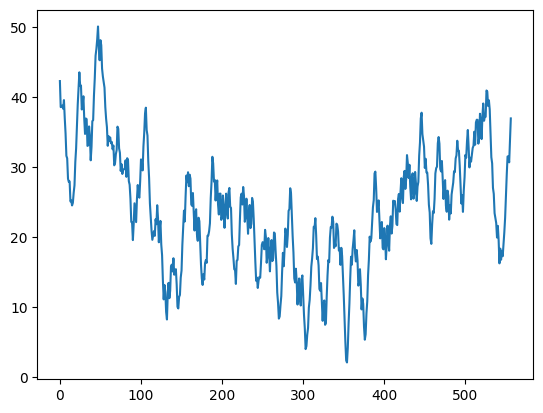

In [67]:
from matplotlib import pyplot as plt
plt.plot(distance_from_point(c, coords))
plt.show()

<b><font color='white' style='background-color:blue'>1.1.k</font></b> Apprêtons-nous à visualiser la distance de chaque atome directement sur l'image 3d de la protéine. Pour ce faire, il y a une astuce à faire : il faudra remplacer la colonne contenant le `facteur b` (cf `1.1.c`) avec les distances. Pour ce faire, il faudra _normaliser_ la liste des distances (c'est à dire, la distance maximale devra être égale à 1, et toutes les autres suivront cette proportion). Une fois normalisées, il faudra créer un nouveaur fichier `1svd_CA_dist.pdb` où les facteur b dans du fichier `1svd_CA.pdb` original ont été remplacés par les distances, tout en suivant le même format !

In [78]:
distances = distance_from_point(c, coords)
d_max = max(distances)
dist_norm = []
for d in distances:
    dist_norm.append(d/d_max)

f_in = open("1svd_CA.pdb")
lines_in = f_in.readlines()
f_in.close()

f_out = open("1svd_CA_dist.pdb", "w")
i = 0
for line in lines_in:
    line_out = line[:60]
    line_out += "{0:6.2f}\n".format(dist_norm[i])
    f_out.write(line_out)
    i += 1
f_out.close()

Voyons votre avancement :

In [82]:
import py3Dmol
view = py3Dmol.view(query='1svd_CA_dist.pdb')
view.setStyle({'sphere':{'colorscheme':{'prop':'b','gradient':'roygb','min':0,'max':1}}})
view.addStyle({'cartoon':{'style': 'trace', 'color':'gray'}})
view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

<b><font color='white' style='background-color:black'>Ex. 1.2</font> Carte de contacts</b><a class='anchor' id='pdb2'></a><br>

Dans cet exercice on va analyser les contacts entre différents acides aminés de la protéine.

<b><font color='white' style='background-color:orange'>1.2.a</font></b> Créez une fonction `filtre_sousunite` qui prend le nom d'un fichier pdb et le nom de l'une des sousunités protéiques (ou _chaîne_) du fichier PDB (voir la description en `1.1.c`) et rend une liste ayant comme éléments les lignes du fichier commençant par `"ATOM"` et dont la sousunité de l'atome correspond à la lettre souhaitée. Si vous avez fait l'exercice `1.1.d`, réutilisez le code !
Dans la deuxième boîte, appelez cette fonction pour afficher les lignes de la sousunité protéique `A` du fichier `1svd.pdb`.

6. Créez une fonction qui discretise une matrice selon un seuil

Visualisons ce que vous avez fait...

In [84]:
def filtre_sousunite(fn, ch):
    res = []
    f = open(fn)
    lines = f.readlines()
    for line in lines:
        if line[:4] == "ATOM":
            if line[21] == ch:
                res.append(line)
    return res

In [85]:
filtre_sousunite("1svd.pdb", "A")

['ATOM      1  N   THR A  16      17.697  48.710 -19.926  1.00 24.75           N  \n',
 'ATOM      2  CA  THR A  16      16.335  48.145 -19.774  1.00 23.50           C  \n',
 'ATOM      3  C   THR A  16      16.152  47.581 -18.356  1.00 20.89           C  \n',
 'ATOM      4  O   THR A  16      15.034  47.291 -17.946  1.00 21.39           O  \n',
 'ATOM      5  CB  THR A  16      16.081  47.066 -20.871  1.00 24.83           C  \n',
 'ATOM      6  OG1 THR A  16      17.313  46.731 -21.540  1.00 26.64           O  \n',
 'ATOM      7  CG2 THR A  16      15.250  47.647 -22.036  1.00 28.68           C  \n',
 'ATOM      8  N   TYR A  17      17.239  47.436 -17.611  1.00 17.28           N  \n',
 'ATOM      9  CA  TYR A  17      17.147  46.870 -16.257  1.00 15.30           C  \n',
 'ATOM     10  C   TYR A  17      17.414  47.902 -15.152  1.00 14.53           C  \n',
 'ATOM     11  O   TYR A  17      17.231  47.592 -13.968  1.00 15.61           O  \n',
 'ATOM     12  CB  TYR A  17      18.098  4

<b><font color='white' style='background-color:orange'>1.2.b</font></b> Pour calculer les interactions entre acides aminés on aura besoin de tous les atomes et non seulement des `"CA"`. Créez une fonction `extraction` qui prend une liste de lignes comme celle créée en `1.2.a` et rend un dictionnaire où les clés sont des `int` spécifiant les numéros de résidu (voir `1.1.c`) et les valeurs sont les listes des triplets correspondant aux coordonnées des atomes du résidu associé. Si vous avez fait `1.1.f`, réutilisez des parties de ce code !
Dans la deuxième boîte, essayez cette fonction sur la liste obtenue en `1.2.a`.

In [94]:
def extraction(L):
    res = {}
    for line in L:
        x = float(line[30:38])
        y = float(line[38:46])
        z = float(line[46:54])
        resid = int(line[22:26].strip())
        if resid not in res:
            res[resid] = []
        res[resid].append((x,y,z))
    return res

In [95]:
extraction(filtre_sousunite("1svd.pdb", "A"))

{16: [(17.697, 48.71, -19.926),
  (16.335, 48.145, -19.774),
  (16.152, 47.581, -18.356),
  (15.034, 47.291, -17.946),
  (16.081, 47.066, -20.871),
  (17.313, 46.731, -21.54),
  (15.25, 47.647, -22.036)],
 17: [(17.239, 47.436, -17.611),
  (17.147, 46.87, -16.257),
  (17.414, 47.902, -15.152),
  (17.231, 47.592, -13.968),
  (18.098, 45.7, -16.135),
  (17.769, 44.551, -17.04),
  (16.894, 43.545, -16.632),
  (18.332, 44.455, -18.314),
  (16.587, 42.477, -17.473),
  (18.062, 43.385, -19.138),
  (17.164, 42.403, -18.72),
  (16.871, 41.324, -19.532)],
 18: [(17.891, 49.097, -15.519),
  (18.047, 50.185, -14.57),
  (16.822, 51.09, -14.699),
  (16.608, 51.723, -15.746),
  (19.349, 50.958, -14.824),
  (19.447, 52.204, -14.056),
  (19.517, 53.474, -14.56),
  (19.517, 52.337, -12.632),
  (19.611, 54.381, -13.538),
  (19.624, 53.712, -12.342),
  (19.516, 51.434, -11.575),
  (19.697, 54.201, -11.042),
  (19.567, 51.916, -10.277),
  (19.661, 53.289, -10.017)],
 19: [(16.02, 51.129, -13.64),
  (14.70

<b><font color='white' style='background-color:green'>1.2.c</font></b> Commençons maintenant par trouver la distance minimale entre deux acides aminés. Pour ce faire, il faut calculer la distance entre tous les atomes d'un résidu et tous les atomes de l'autre et choisir la distance minimale. Créez une fonction `min_dist` qui prend le dictionnaire créé en `1.2.b`, deux numéros de résidu (c'est à dire deux `int`), et rend la distance minimale entre les deux résidus correspondants. Si au moins l'un des deux résidus n'est pas parmi les clés du dictionnaire, il faudra terminer l'exécution avec cette instruction : `raise BaseException("Erreur : numéro(s) de résidu invalide(s) !")`. **Remarque :** pour la formule de la distance, voir `1.1.h`.
Dans la deuxième boîte, essayez votre fonction sur le dictionnaire en `1.2.b` et les couples de résidus `30, 30`, `30, 40`, `40, 30` : que vous attendez-vous ? Qu'obtenez-vous ?

In [104]:
def min_dist(D, r1, r2):
    if not (r1 in D and r2 in D):
        raise BaseException("Erreur : numéro(s) de résidu invalide(s) !")
    res = 1000
    for x1, y1, z1 in D[r1]:
        for x2, y2, z2 in D[r2]:
            d = ((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)**0.5
            if d < res:
                res = d
    return d

In [106]:
d = extraction(filtre_sousunite("1svd.pdb", "A"))
print(min_dist(d, 30, 30))
print(min_dist(d, 40, 30))
print(min_dist(d, 30, 40))

0.0
26.254646065030094
26.254646065030094


**On s'attend que la première distance soit 0 car le résidu est le même, et que les autres deux distances soient égales car c'est les mêmes deux résidus**

<b><font color='white' style='background-color:blue'>1.2.d</font></b> Calculons maintenant la distance entre un résidu et tous les résidus de la sousunité. Créez une fonction `distances_from_residue` qui prend le dictionnaire du `1.2.b`, un numéro de résidu, et rend une liste de distances entre le résidu spécifié et chaque résidu du dictionnaire (inclus lui-même). **Attention :** les résidus doivent être listés en ordre ! Utilisez la fonction `sorted` sur les numéros de résidu pour obtenir le bon ordre. La liste des distances doit bien évidemment suivre cet ordre. **Remarque :** utilisez la fonction que vous avez créée en `1.2.c`.

In [114]:
def distances_from_residue(D, r):
    L = []
    for k in D:
        L.append(k)
        
    res = []
    L = sorted(L)
    for k in L:
        res.append(min_dist(D, r, k))
    return res

In [115]:
distances_from_residue(d, 30)

445

<b><font color='white' style='background-color:blue'>1.2.e</font></b> Finalement, calculons les distaces de tous contre tous les acides aminés. Créez une fonction `all_vs_all` qui prend le dictionnaire défini en `1.2.b` et rend une _matrice_ de distances entre les résidus. C'est à dire, la fonction doit rendre une liste dont les éléments sont des listes comme obtenu en `1.2.d`. **Remarque :** il faudra donc bien utiliser la fonction créée en `1.2.d`. **Attention :** rappelez-vous du bon ordre des résidus !

In [116]:
def all_vs_all(D):
    L = []
    for k in D:
        L.append(k)
        
    res = []
    L = sorted(L)
    for k in L:
        res.append(distances_from_residue(D, k))
    return res

In [117]:
all_vs_all(d)

445

Voici ce que vous avez calculé :

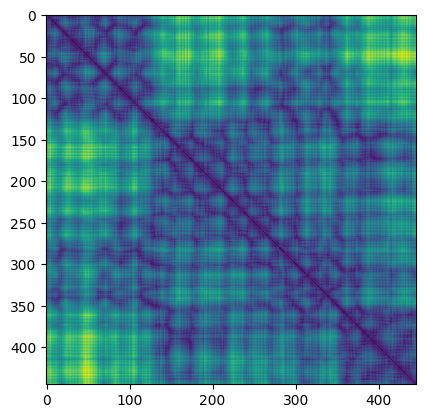

In [119]:
# Ne pas modifier !
from matplotlib import pyplot as plt

M = all_vs_all(extraction(filtre_sousunite("1svd.pdb", "A")))
plt.imshow(M)

Les régions bleues sont celles où les distances entre acides aminés sont plus faibles, c'est à dire les points de contacts entre résidus. Elles sont diposées géométriquement, et reflètent les éléments géométriques de la structure protéique, que vous pouvez retrouver chez la visualisation 3d de l'exercice 1. Cette correspondance entre géométrie 3d et géométrie sur la carte de contact est au coeur des stratégies de prédictions de structure protéique, dont le fameux [AlphaFold](https://www.youtube.com/watch?v=gg7WjuFs8F4&themeRefresh=1).

<h3>2. Drapeaux du monde</h3><a class='anchor' id='drapeaux'></a>

En utilisant quelques connaissances basiques vues en `TP04` (qui, comme tous les TP, fait partie du matériel à étudier !), et à l'aide de quelques conditions et boucles imbriquées, on va recréer les drapeaux de plusieurs pays !

<b><font color='white' style='background-color:black'>Ex. 2.1</font> 5 Drapeaux en petit format</b><a class='anchor' id='drapeaux1'></a><br>

Ici une fonction qui vous aidera en la visualisation des images que vous créerez :

In [120]:
# Ne pas modifier !
from PIL import Image 

def afficher_image_axes(img):
    from matplotlib.pyplot import imshow, show, axis, gca, figure
    from matplotlib.axis import XAxis
    from numpy import asarray
    # pour afficher les courbes dans le notebook
    # (nécessaire pour les versions anciennes de jupyter)
    %matplotlib inline
    fig=figure(figsize=(10,7), dpi= 70)
    hauteur = img.height
    largeur = img.width
    pasX = max(largeur // 10, 1)
    pasY = max(hauteur // 10, 1)
    axis('on')
    axeX = gca().get_xaxis()
    axeY = gca().get_yaxis()
    axeX.set_ticks_position('top')
    axeX.set_ticks(range(0,largeur,pasX))
    axeY.set_ticks(range(0,hauteur, pasY))
    imshow(asarray(img))
    show()

<b><font color='white' style='background-color:orange'>2.1.a</font></b> Commençons avec la France : à l'aide de la fonction `new` de la sousbibliothèque `Image`, créez un objet image `france` en mode `RGB`, largeur `18` et hauteur `12`. Recréez la figure ci-dessous.

![](france.png)

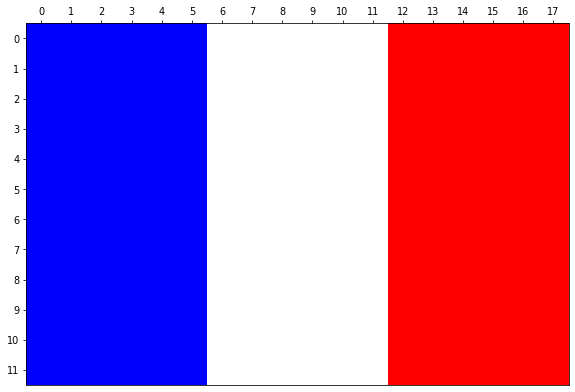

In [162]:
france = Image.new(mode="RGB", size=(18,12))
for x in range(18):
    for y in range(12):
        if x <= 5:
            france.putpixel((x,y), (0, 0, 255))
        elif x > 5 and x<=11:
            france.putpixel((x,y), (255, 255, 255))
        else:
            france.putpixel((x,y), (255, 0, 0))
afficher_image_axes(france)

<b><font color='white' style='background-color:orange'>2.1.b</font></b> Maintenant, la Thailande :

![](thailande.png)

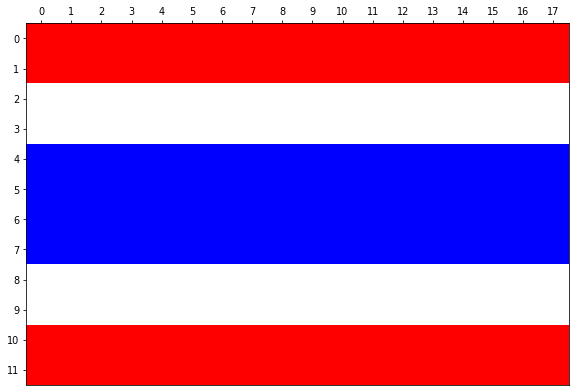

In [133]:
thailande = Image.new(mode="RGB", size=(18,12))
for x in range(18):
    for y in range(12):
        if y <= 1 or y >= 10:
            thailande.putpixel((x,y), (255, 0, 0))
        elif y <= 3 or y >= 8:
            thailande.putpixel((x,y), (255, 255, 255))
        else:
            thailande.putpixel((x,y), (0, 0, 255))
afficher_image_axes(thailande)

<b><font color='white' style='background-color:orange'>2.1.c</font></b> C'est le tour du Danemark :

![](denmark.png)

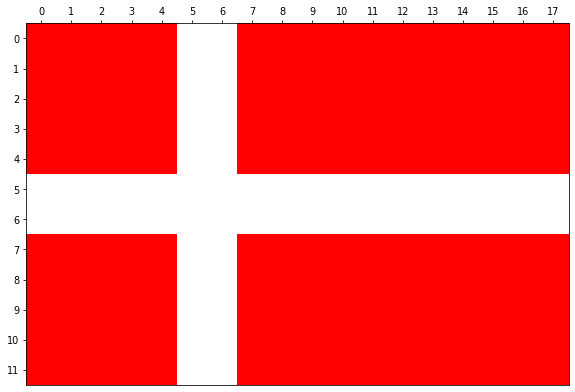

In [135]:
denmark = Image.new(mode="RGB", size=(18,12))
for x in range(18):
    for y in range(12):
        if y == 5 or y == 6 or x == 5 or x == 6:
            denmark.putpixel((x,y), (255, 255, 255))
        else:
            denmark.putpixel((x,y), (255, 0, 0))
afficher_image_axes(denmark)

<b><font color='white' style='background-color:orange'>2.1.d</font></b> Or, la Suisse est un peu plus difficile :

![](suisse.png)

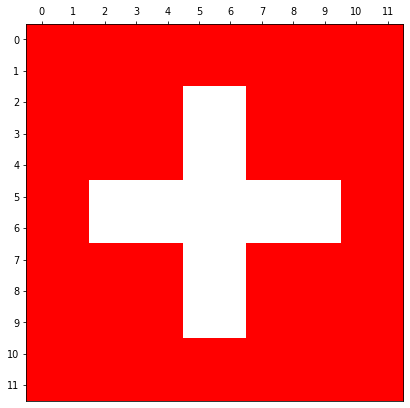

In [137]:
suisse = Image.new(mode="RGB", size=(12,12))
for x in range(12):
    for y in range(12):
        if (x > 1 and x < 10 and (y == 5 or y == 6)) or (y > 1 and y < 10 and (x == 5 or x == 6)):
            suisse.putpixel((x,y), (255, 255, 255))
        else:
            suisse.putpixel((x,y), (255, 0, 0))
afficher_image_axes(suisse)

<b><font color='white' style='background-color:green'>2.1.e</font></b> La Grèce est laborieuse aussi !

![](grece.png)

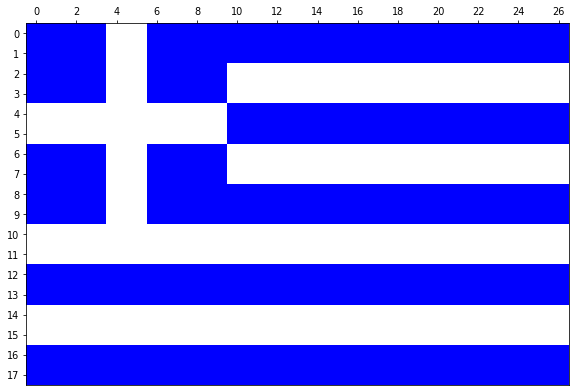

In [161]:
grece = Image.new(mode="RGB", size=(27,18))
for x in range(27):
    for y in range(18):
        if x < 10 and y < 10:
            if x == 4 or x == 5 or y == 4 or y == 5:
                grece.putpixel((x,y), (255, 255, 255))
            else:
                grece.putpixel((x,y), (0, 0, 255))
        else: 
            if y%4 < 2:
                grece.putpixel((x,y), (0, 0, 255))
            else:
                grece.putpixel((x,y), (255, 255, 255))
afficher_image_axes(grece)

<b><font color='white' style='background-color:black'>Ex. 2.2</font> 2 Drapeaux en grand format</b><a class='anchor' id='drapeaux2'></a><br>

Les drapeaux de `2.1` n'utilisent que des lignes horizontales et verticales : même une petite grille de pixels peuvent les reproduire. Par contre, si on a des lignes courbes ou diagonales, il faut une résolution bien plus haute. Dans cet exercice on va travailler sur deux exemples.

<b><font color='white' style='background-color:green'>2.2.a</font></b> Reproduisez le drapeau du Japon ! L'image devra être de taille `3000 x 2000`. Le centre du cercle rouge doit coincider avec le centre de l'image, et son diamètre doit être la moitié de l'hauteur de l'image. **Remarque :** comment dessiner le cercle ? Rappelez-vous de la formule du cercle :
$$(y - y_c)^2 + (x - x_c)^2 = r^2$$
où $(x_c, y_c)$ sont les coordonnées du centre.

![](japon.png)

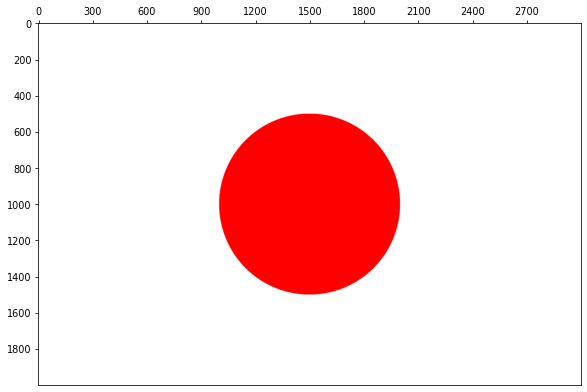

In [140]:
japon = Image.new(mode="RGB", size=(3000,2000))
xc = 1500
yc = 1000
for x in range(3000):
    for y in range(2000):
        if (x - xc)**2 + (y - yc)**2 < 500**2:
            japon.putpixel((x,y), (255, 0, 0))
        else:
            japon.putpixel((x,y), (255, 255, 255))
afficher_image_axes(japon)

<b><font color='white' style='background-color:green'>2.2.a</font></b> C'est le tour du Soudan ! L'image devra être de taille `600 x 300`. Suivez les proportions que vous trouvez sur la [page Wikipédia du drapeau](https://en.wikipedia.org/wiki/Flag_of_Sudan).

![](soudan.png)

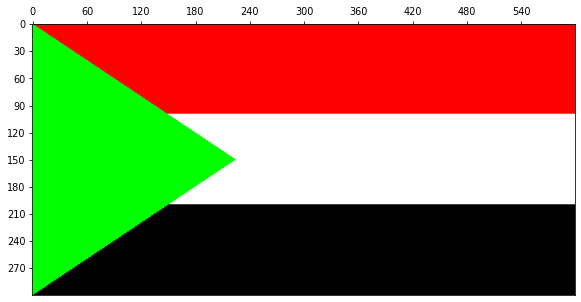

In [155]:
soudan = Image.new(mode="RGB", size=(600,300))
for x in range(600):
    for y in range(300):
        if 3*y - 2*x > 0 and 3*(y - 300) + 2*x < 0:
            soudan.putpixel((x,y), (0, 255, 0))
        else:
            if y < 100:
                soudan.putpixel((x,y), (255, 0, 0))
            elif y < 200:
                soudan.putpixel((x,y), (255, 255, 255))
            else:
                soudan.putpixel((x,y), (0, 0, 0))
afficher_image_axes(soudan)